In [22]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
train_norm = "E:/GuardU-main/app testing/pneumonia/normal"
train_pneu = "E:/GuardU-main/app testing/pneumonia/infected"
val_norm = "E:/GuardU-main/app testing/pneumonia/normal"
val_pneu = "E:/GuardU-main/app testing/pneumonia/infected"
test_norm = "E:/GuardU-main/app testing/pneumonia/normal"
test_pneu = "E:/GuardU-main/app testing/pneumonia/infected"

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
infected_images = []
for file in os.listdir(train_pneu):
    img = Image.open(os.path.join(train_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)

In [26]:
for file in os.listdir(val_pneu):
    img = Image.open(os.path.join(val_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    infected_images.append(img)

In [27]:
print(len(infected_images))

12


In [28]:
normal_images = []
for file in os.listdir(train_norm):
    img = Image.open(os.path.join(train_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [29]:
for file in os.listdir(val_norm):
    img = Image.open(os.path.join(val_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    normal_images.append(img)

In [30]:
print(len(normal_images))

12


In [31]:
X_train = np.asarray(infected_images + normal_images)
y_train = np.asarray([1 for _ in range(len(infected_images))] + [0 for _ in range(len(normal_images))])

In [32]:
print(X_train.shape)
print(y_train.shape)

X_train = X_train.reshape((5232, 36, 36,1))
print(X_train.shape)
print(y_train.shape)

(24, 36, 36)
(24,)


ValueError: cannot reshape array of size 31104 into shape (5232,36,36,1)

In [33]:
test_infected_images = []
for file in os.listdir(test_pneu):
    img = Image.open(os.path.join(test_pneu, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_infected_images.append(img)

In [34]:
test_normal_images = []
for file in os.listdir(test_norm):
    img = Image.open(os.path.join(test_norm, file)).convert('L')
    img = img.resize((36,36))
    img = np.asarray(img)
    test_normal_images.append(img)

In [35]:
X_test = np.asarray(test_infected_images + test_normal_images)
y_test = np.asarray([1 for _ in range(len(test_infected_images))] + [0 for _ in range(len(test_normal_images))])

In [36]:
print(X_test.shape)
print(y_test.shape)

X_test = X_test.reshape((624, 36, 36,1))
print(X_test.shape)
print(y_test.shape)

(12, 36, 36)
(12,)


ValueError: cannot reshape array of size 15552 into shape (624,36,36,1)

In [37]:
X = np.asarray(infected_images + test_infected_images + normal_images + test_normal_images)
y = np.asarray([1 for _ in range(len(infected_images)+len(test_infected_images))] + [0 for _ in range(len(test_normal_images)+len(normal_images))])

In [38]:
print(X.shape)
print(y.shape)
X = X.reshape((5856, 36, 36, 1))
print(X.shape)
print(y.shape)

(36, 36, 36)
(36,)


ValueError: cannot reshape array of size 46656 into shape (5856,36,36,1)

In [39]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 2)

In [40]:
from sklearn.utils import shuffle

In [41]:
X, y = shuffle(X, y)
X = X / 255.0

[1. 0.]


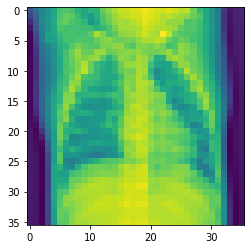

[1. 0.]


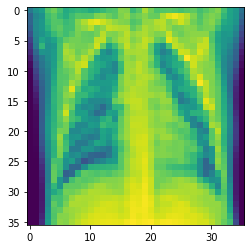

[1. 0.]


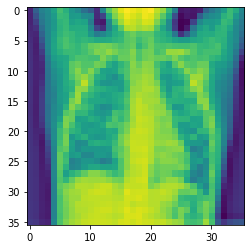

[0. 1.]


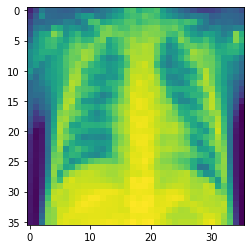

[1. 0.]


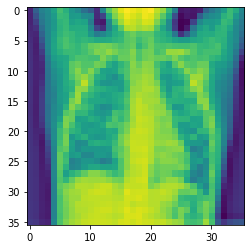

[0. 1.]


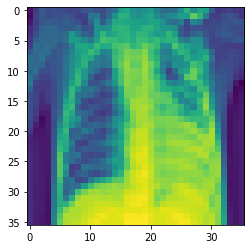

[0. 1.]


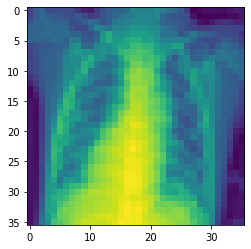

[0. 1.]


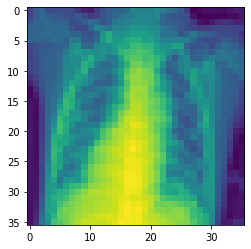

[1. 0.]


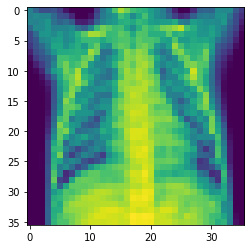

[0. 1.]


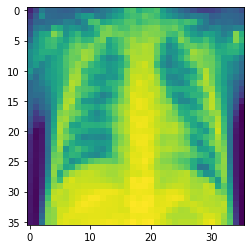

In [42]:
for i in range(10):
    print(y[i])
    plt.imshow(X[i].reshape((36, 36)))
    plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (28, 36, 36) (28, 2)
Test size: (8, 36, 36) (8, 2)


In [45]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [46]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 36, 36)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15
147/147 [==============================] - 17s 115ms/step - loss: 0.3066 - accuracy: 0.8956 - val_loss: 3.6959 - val_accuracy: 0.7167
Epoch 2/15
147/147 [==============================] - 17s 114ms/step - loss: 0.1800 - accuracy: 0.9317 - val_loss: 4.9970 - val_accuracy: 0.7167
Epoch 3/15
147/147 [==============================] - 17s 114ms/step - loss: 0.1393 - accuracy: 0.9453 - val_loss: 2.0698 - val_accuracy: 0.7167
Epoch 4/15
147/147 [==============================] - 17s 114ms/step - loss: 0.1290 - accuracy: 0.9500 - val_loss: 1.2238 - val_accuracy: 0.7517
Epoch 5/15
147/147 [==============================] - 17s 116ms/step - loss: 0.1145 - accuracy: 0.9590 - val_loss: 0.4387 - val_accuracy: 0.7739
Epoch 6/15
147/147 [==============================] - 17s 118ms/step - loss: 0.1037 - accuracy: 0.9603 - val_loss: 0.1511 - val_accuracy: 0.9352
Epoch 7/15
147/147 [==============================] - 18s 121ms/step - loss: 0.0854 - accuracy: 0.9669 - val_loss: 0.1338 - val_ac

In [ ]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:5]

[0, 0, 0, 1, 0]

In [ ]:
tru = [np.argmax(i) for i in y_test]
from sklearn.metrics import confusion_matrix
confusion_matrix(tru, pred)

array([[330,   2],
       [443, 397]], dtype=int64)

In [ ]:
model.save('pneumonia2.h5')